## Generate Result Tables
- MCHAD
- G-MCHAD
- CAC
- II
- Center Loss
- Softmax Thresholding
- Energy based OOD


In [87]:
import seaborn as sb
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import pandas as pd
from os.path import join

In [88]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

In [89]:
# map test cases
dataset_map = {
    "test_vs_uniformnoise": "Gauss",
    "test_vs_gaussiannoise": "Uniform",
    "test_vs_tinycrop": "Tiny Crop",
    "test_vs_tinyresize": "Tiny Resize",
    "test_vs_lsuncrop": "LSUN Crop",
    "test_vs_lsunresize": "LSUN Resize",
    "test_vs_textures": "Texture",
}

model_map = {
    "src.models.CAC": "CAC",
    "src.models.Softmax": "Softmax",
    "src.models.MCHAD": "MCHAD",
    "src.models.Center": "Center",
    "src.models.II": "II",
}


train_dataset_map = {
    "src.datamodules.cifar10_datamodule.CIFAR10DataModule": "CIFAR10",
    "src.datamodules.SVHNDataModule": "SVHN",
    "src.datamodules.cifar100_datamodule.CIFAR100DataModule": "CIFAR100",
}

In [90]:
def convert(df, key="Distance", task="OSR"):
    """
    Get correct metrics from dataframe
    """
    df.rename(
        inplace=True,
        columns={
            "Accuracy/test": "Accuracy",
            f"{key}/{task}/AUROC/test": "AUROC",
            f"{key}/{task}/AUPR-IN/test": "AUPR-IN",
            f"{key}/{task}/AUPR-OUT/test": "AUPR-OUT",
            f"{key}/{task}/FPR@95TPR/test": "FPR95",
        },
    )

    return df

In [91]:
root = "/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/"

directories = [
    "./cifar10/gmchad/3",
    "./cifar10/gmchad/1",
    "./cifar10/gmchad/0",
    "./cifar10/gmchad/2",
    "./cifar10/gmchad/5",
    "./cifar10/gmchad/4",
    "./cifar10/center/3",
    "./cifar10/center/1",
    "./cifar10/center/0",
    "./cifar10/center/2",
    "./cifar10/center/5",
    "./cifar10/center/4",
    "./cifar10/softmax/3",
    "./cifar10/softmax/1",
    "./cifar10/softmax/0",
    "./cifar10/softmax/2",
    "./cifar10/softmax/5",
    "./cifar10/softmax/4",
    "./cifar10/mchad/3",
    "./cifar10/mchad/1",
    "./cifar10/mchad/0",
    "./cifar10/mchad/2",
    "./cifar10/mchad/5",
    "./cifar10/mchad/4",
    "./cifar10/ii/3",
    "./cifar10/ii/1",
    "./cifar10/ii/0",
    "./cifar10/ii/2",
    "./cifar10/ii/5",
    "./cifar10/ii/4",
    "./cifar10/cac/3",
    "./cifar10/cac/1",
    "./cifar10/cac/0",
    "./cifar10/cac/2",
    "./cifar10/cac/5",
    "./cifar10/cac/4",
    "./cifar100/mchad/3",
    "./cifar100/mchad/1",
    "./cifar100/mchad/0",
    "./cifar100/mchad/2",
    "./cifar100/mchad/5",
    "./cifar100/mchad/4",
    "./cifar100/gmchad/3",
    "./cifar100/gmchad/1",
    "./cifar100/gmchad/0",
    "./cifar100/gmchad/2",
    "./cifar100/gmchad/5",
    "./cifar100/gmchad/4",
    "./cifar100/center/3",
    "./cifar100/center/1",
    "./cifar100/center/0",
    "./cifar100/center/2",
    "./cifar100/center/5",
    "./cifar100/center/4",
    "./cifar100/softmax/3",
    "./cifar100/softmax/1",
    "./cifar100/softmax/0",
    "./cifar100/softmax/2",
    "./cifar100/softmax/5",
    "./cifar100/softmax/4",
    "./cifar100/ii/3",
    "./cifar100/ii/1",
    "./cifar100/ii/0",
    "./cifar100/ii/2",
    "./cifar100/ii/5",
    "./cifar100/ii/4",
    "./cifar100/cac/3",
    "./cifar100/cac/1",
    "./cifar100/cac/0",
    "./cifar100/cac/2",
    "./cifar100/cac/5",
    "./cifar100/cac/4",
    "./svhn/gmchad/3",
    "./svhn/gmchad/1",
    "./svhn/gmchad/0",
    "./svhn/gmchad/2",
    "./svhn/gmchad/5",
    "./svhn/gmchad/4",
    "./svhn/center/3",
    "./svhn/center/1",
    "./svhn/center/0",
    "./svhn/center/2",
    "./svhn/center/5",
    "./svhn/center/4",
    "./svhn/softmax/3",
    "./svhn/softmax/1",
    "./svhn/softmax/0",
    "./svhn/softmax/2",
    "./svhn/softmax/5",
    "./svhn/softmax/4",
    "./svhn/mchad/3",
    "./svhn/mchad/1",
    "./svhn/mchad/0",
    "./svhn/mchad/2",
    "./svhn/mchad/5",
    "./svhn/mchad/4",
    "./svhn/ii/3",
    "./svhn/ii/1",
    "./svhn/ii/0",
    "./svhn/ii/2",
    "./svhn/ii/5",
    "./svhn/ii/4",
    "./svhn/cac/3",
    "./svhn/cac/1",
    "./svhn/cac/0",
    "./svhn/cac/2",
    "./svhn/cac/5",
    "./svhn/cac/4",
]

In [92]:


def get_training_set(datamodule):
    target = datamodule["_target_"]
    d = train_dataset_map.get(target)

    if not d:
        if target == "src.datamodules.multi_datamodule.MultiDatamodule":
            d = train_dataset_map.get(datamodule["module1"]["_target_"])

    if not d:
        print(datamodule)
    else:
        print(d)

    return d


def load(path):
    local_df = []

    df = pd.read_csv(join(path, "results.csv"))
    metrics = pd.read_csv(join(path, "csv/version_0/metrics.csv"))
    config = OmegaConf.load(join(path, "config.yaml"))
    df["Dataset"] = get_training_set(config["datamodule"])
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    model = str(config["model"]["_target_"])

    if model == "src.models.CAC":
        df["Model"] = "CAC"
        df = convert(df, "Distance")
    elif model == "src.models.SoftMax":
        print("EBM")
        df_ebm = df.copy(deep=True)
        df_ebm["Model"] = "EBM"
        df_emb = convert(df_ebm, "EnergyBased")

        local_df.append(df_ebm)

        print("Softmax")
        df["Model"] = "Softmax"
        df = convert(df, "Softmax")

    elif model == "src.models.MCHAD":
        if config["model"]["weight_oe"] == 0.0:
            # print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "MCHAD"
        else:
            print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "G-MCHAD"

        df = convert(df)
    elif model == "src.models.Center":
        df["Model"] = "Center"
        df = convert(df, "Softmax")
    elif model == "src.models.IIModel":
        df["Model"] = "II"
        df = convert(df)
    else:
        print(f"UNKNOWN: {model}")
        return None, None

    local_df.append(df)
    return config, pd.concat(local_df), metrics

In [93]:
dfs = []

for d in directories:
    # filter(lambda x: "center" not in x and "cifar100/softmax/" not in x and "mchad-o" not in x, directories):
    path = join(root, d)
    config, df, metrics = load(path)
    try:
        if df is not None:
            print(path)
            print(
                f"{df['Dataset'][0]}/{df['Model'][0]} -> {df['AUROC'].mean()} {len(df)}"
            )
            df = df[
                [
                    "Accuracy",
                    "AUROC",
                    "AUPR-IN",
                    "AUPR-OUT",
                    "FPR95",
                    "Dataset",
                    "Outliers",
                    "Model",
                ]
            ]
            dfs.append(df.copy())
    except:
        print("EXCEPTION WHILE LOADING")
        print(df.columns)

df = pd.concat(dfs)

CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/3
CIFAR10/G-MCHAD -> 0.8800134573663984 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/1
CIFAR10/G-MCHAD -> 0.879264099257333 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/0
CIFAR10/G-MCHAD -> 0.8553295646395002 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/2
CIFAR10/G-MCHAD -> 0.8040333901132856 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/5
CIFAR10/G-MCHAD -> 0.8562206370489938 8
CIFAR10
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/11/30/21-11:16:09/./cifar10/gmchad/4
CIFAR10/G-MCHAD -> 0.8600879652159554 8
CIFAR10
/home/ki/projects/work/mchad/logs/multiruns/complete/11/3

In [94]:
df["AUROC"] = df["AUROC"].apply(lambda x: x * 100)
df["AUPR-IN"] = df["AUPR-IN"].apply(lambda x: x * 100)
df["AUPR-OUT"] = df["AUPR-OUT"].apply(lambda x: x * 100)
df["FPR95"] = df["FPR95"].apply(lambda x: x * 100)
df["Accuracy"] = df["Accuracy"].apply(lambda x: x * 100)

In [95]:
df = df.set_index(["Dataset", "Outliers", "Model"]).dropna()


In [96]:
from itertools import product
datasets = ["SVHN", "CIFAR10", "CIFAR100"]
models = ["CAC", "II", "Center", "Softmax", "EBM", "MCHAD", "G-MCHAD"]

t =  df.reset_index().groupby(by=["Dataset", "Model"]).agg(
        {
            "Accuracy": ["mean", "sem"],
            "AUROC": ["mean", "sem"],
            "AUPR-IN": ["mean", "sem"],
            "AUPR-OUT": ["mean", "sem"],
            "FPR95": ["mean", "sem"],
        }
    ).reindex(list(product(datasets, models)))

s = t.to_latex(
        float_format="%.2f",
        multirow=True,
        escape=False,
        label="tab:results",
        # bold_rows="True",
    )

repl = {
    "mean": "Mean",
    "sem": "$\\pm \sigma_{\\bar{x}}$",
    " MCHAD": " \\textbf{MCHAD (ours)}",
    "G-MCHAD": "\\textbf{G-MCHAD (ours)}",
}

for k, v in repl.items():
    s = s.replace(k, v)

print(s)

\begin{table}
\centering
\label{tab:results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
         &         & \multicolumn{2}{l}{Accuracy} & \multicolumn{2}{l}{AUROC} & \multicolumn{2}{l}{AUPR-IN} & \multicolumn{2}{l}{AUPR-OUT} & \multicolumn{2}{l}{FPR95} \\
         &         &     Mean &  $\pm \sigma_{\bar{x}}$ &  Mean &  $\pm \sigma_{\bar{x}}$ &    Mean &  $\pm \sigma_{\bar{x}}$ &     Mean &  $\pm \sigma_{\bar{x}}$ &  Mean &  $\pm \sigma_{\bar{x}}$ \\
Dataset & Model &          &      &       &      &         &      &          &      &       &      \\
\midrule
\multirow{7}{*}{SVHN} & CAC &    95.47 & 0.09 & 93.83 & 0.42 &   95.61 & 0.38 &    85.00 & 0.80 & 18.69 & 1.43 \\
         & II &    11.00 & 0.29 & 68.03 & 3.51 &   84.09 & 1.96 &    48.93 & 4.56 & 69.50 & 6.23 \\
         & Center &    95.13 & 0.10 & 97.77 & 0.16 &   99.20 & 0.06 &    91.52 & 0.67 & 11.25 & 1.16 \\
         & Softmax &    88.36 & 0.20 & 80.97 & 0.25 &   92.73 & 0.19 &    46.99 & 0.77 & 95.51 & 0.64 \\
         & E

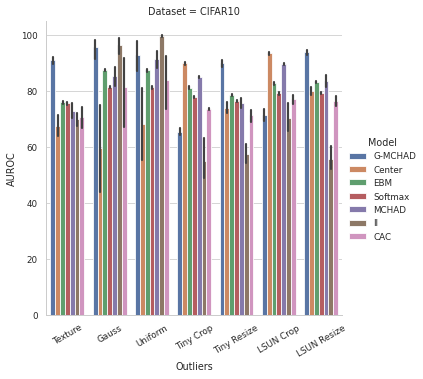

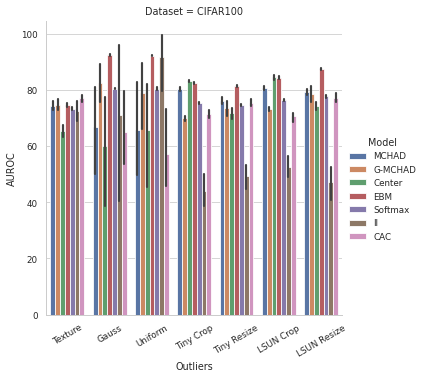

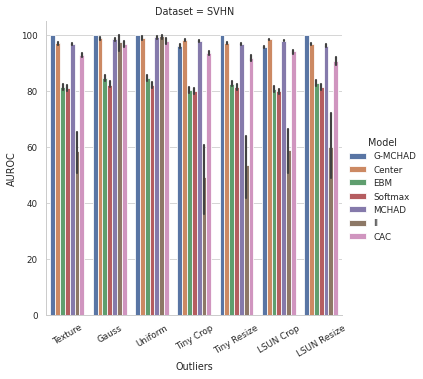

In [97]:
for dataset in ["CIFAR10", "CIFAR100", "SVHN"]:
    g = sb.catplot(
        data=df.reset_index()[df.reset_index()["Dataset"] == dataset],
        x="Outliers",
        y="AUROC",
        kind="bar",
        hue="Model",
        col="Dataset",
    )
    g.set_xticklabels(rotation=30)
    plt.savefig(f"out/single-auroc-{dataset}.png", dpi=300)
    plt.show()

In [98]:
tmp = df.reset_index().copy()
tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

print(
    tmp
    .groupby(by=["Dataset", "Model"])
    .agg(
        {
            "Accuracy": ["mean", "std"],
            "AUROC": ["mean", "std"],
            "AUPR-IN": ["mean", "std"],
            "AUPR-OUT": ["mean", "std"],
            "FPR95": ["mean", "std"],
        }
    )
    .to_html(
        float_format="%.2f",
        escape=False,
    )
)


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">Accuracy</th>
      <th colspan="2" halign="left">AUROC</th>
      <th colspan="2" halign="left">AUPR-IN</th>
      <th colspan="2" halign="left">AUPR-OUT</th>
      <th colspan="2" halign="left">FPR95</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>Dataset</th>
      <th>Model</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">CIFAR10</th>
      <th>G-MCHAD</th>
      <td>91.22</td>
      <td>0.22</td>
      <td>85.58</td>
      <td>11.93</td>
      

In [99]:
from scipy.stats import ttest_ind

tmp = df.reset_index().copy()
# tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

for metric in ["Accuracy", "AUROC", "AUPR-IN", "AUPR-OUT", "FPR95"]:
    for dataset in ["SVHN", "CIFAR10", "CIFAR100"]:
        a = tmp[(tmp["Model"] == "CAC") & (tmp["Dataset"] == dataset)][metric]
        b = tmp[(tmp["Model"] == "MCHAD") & (tmp["Dataset"]== dataset)][metric]
        stat, p = ttest_ind(a,b, equal_var=False)
        print(f"{metric} {dataset} -> {p < 0.05} ")

Accuracy SVHN -> False 
Accuracy CIFAR10 -> True 
Accuracy CIFAR100 -> False 
AUROC SVHN -> True 
AUROC CIFAR10 -> True 
AUROC CIFAR100 -> False 
AUPR-IN SVHN -> True 
AUPR-IN CIFAR10 -> True 
AUPR-IN CIFAR100 -> True 
AUPR-OUT SVHN -> True 
AUPR-OUT CIFAR10 -> True 
AUPR-OUT CIFAR100 -> False 
FPR95 SVHN -> True 
FPR95 CIFAR10 -> True 
FPR95 CIFAR100 -> True 
